<a href="https://colab.research.google.com/github/jiin124/Dacon/blob/main/%EC%86%8C%EC%84%A4_%EC%9E%91%EA%B0%80_%EB%B6%84%EB%A5%98_AI_%EA%B2%BD%EC%A7%84%EB%8C%80%ED%9A%8C/%EC%86%8C%EC%84%A4_%EC%9E%91%EA%B0%80_%EB%B6%84%EB%A5%98_AI_%EA%B2%BD%EC%A7%84%EB%8C%80%ED%9A%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import warnings 
warnings.filterwarnings(action='ignore')
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
import re

In [ ]:
import os
os.chdir('/content/drive/MyDrive/소설작가/')

In [ ]:
train=pd.read_csv('/content/drive/MyDrive/소설작가/train.csv',encoding='utf-8')
test=pd.read_csv('/content/drive/MyDrive/소설작가/test_x.csv',encoding='utf-8')
sample=pd.read_csv('/content/drive/MyDrive/소설작가/sample_submission.csv',encoding='utf-8')

In [ ]:
train.head()

,text,author
0,almost choking much much wanted say strange ex...,3
1,sister asked suppose,2
2,engaged one day walked perusing janes last let...,1
3,captain porch keeping carefully way treacherou...,4
4,mercy gentlemen odin flung hands dont write an...,3


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54879 entries, 0 to 54878
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   54879 non-null  int64 
 1   text    54879 non-null  object
 2   author  54879 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.3+ MB


In [ ]:
train['author'].value_counts()

3    15063
0    13235
2    11554
4     7805
1     7222
Name: author, dtype: int64

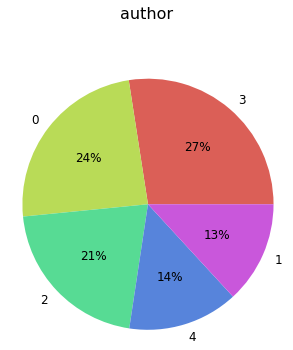

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,5))
plt.pie(train['author'].value_counts(),
       labels=train['author'].value_counts().index,
       autopct='%d%%',
        colors=sns.color_palette('hls',len(train['author'].value_counts().index)),
       textprops={'fontsize':12})
plt.axis('equal')
plt.title("author", fontsize=16, pad=50)
plt.show()

## 전처리

In [ ]:
#부호를 제거해주는 함수
def alpha_num(text):
    return re.sub(r'[^A-Za-z0-9 ]', '', text)

train['text']=train['text'].apply(alpha_num)

In [ ]:
train

,index,text,author
0,0,He was almost choking There was so much so muc...,3
1,1,Your sister asked for it I suppose,2
2,2,She was engaged one day as she walked in peru...,1
3,3,The captain was in the porch keeping himself c...,4
4,4,Have mercy gentlemen odin flung up his hands D...,3
...,...,...,...
54874,54874,Is that you Mr Smith odin whispered I hardly d...,2
54875,54875,I told my plan to the captain and between us w...,4
54876,54876,Your sincere wellwisher friend and sister LUC...,1
54877,54877,Then you wanted me to lend you money,3


부호가 제거되었다. 

In [ ]:
pip install konlpy 

     |████████████████████████████████| 19.4 MB 1.3 MB/s 
     |████████████████████████████████| 448 kB 52.4 MB/s 


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from konlpy.tag import Okt

In [ ]:
stop_words_list=stopwords.words('english')
print('불용어 개수:',len(stop_words_list))
print('불용어 10개 출력:',stop_words_list)

불용어 개수: 179
불용어 10개 출력: ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own',

In [ ]:
# 불용어 제거

def remove_stopwords(text):
  final_text=[]
  for i in text.split():
    if i.strip().lower() not in stop_words_list:
      final_text.append(i.strip())
  return " ".join(final_text)

In [ ]:
#전처리 적용
train['text']=train['text'].str.lower()
test['text']=test['text'].str.lower()#소문자

train['text']=train['text'].apply(alpha_num).apply(remove_stopwords)
test['text']=test['text'].apply(alpha_num).apply(remove_stopwords)

In [ ]:
train.head()

,text,author
0,almost choking much much wanted say strange ex...,3
1,sister asked suppose,2
2,engaged one day walked perusing janes last let...,1
3,captain porch keeping carefully way treacherou...,4
4,mercy gentlemen odin flung hands dont write an...,3


In [ ]:
test.head()

,index,text
0,0,think one charming young ladies ever met might...
1,1,replied sudden consciousness find cannot ignor...
2,2,lady stated intention screaming course would s...
3,3,suddenly silence heard sound sent heart mouth ...
4,4,conviction remained unchanged far knowand beli...


불용어가 제거되었다.

## 모델링

In [ ]:
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
import random

In [ ]:
torch.manual_seed(1)

In [ ]:
batch_size=64
lr=0.001
epochs=10


In [ ]:
use_cuda=torch.cuda.is_available()
device=torch.device("cuda" if use_cuda else "cpu")
print("cpu와 cuda 중 다음 기기로 학습함:",device)

cpu와 cuda 중 다음 기기로 학습함: cpu


In [ ]:
train.drop('index',axis=1,inplace=True)
test.drop('index',axis=1,inplace=True)

KeyError: ignored

In [ ]:
train.to_csv('train1.csv',index=False)
test.to_csv('test1.csv',index=False)

In [ ]:
test.head()

,text
0,think one charming young ladies ever met might...
1,replied sudden consciousness find cannot ignor...
2,lady stated intention screaming course would s...
3,suddenly silence heard sound sent heart mouth ...
4,conviction remained unchanged far knowand beli...


In [ ]:
pip install torchtext

In [ ]:
from torchtext.legacy.data import TabularDataset

In [ ]:
from torchtext.legacy import data # torchtext.data 임포트

# 필드 정의
TEXT =data.Field(sequential=True,#시퀀스 데이터 여부
                  use_vocab=True,#단어집합을 만들것인지 여부
                  tokenize=str.split,#어떤 토큰화 함수를 사용할 것인지 가정.
                  lower=True,#영어 데이터를 전부 소문자화
                  batch_first=True,#미니배치 차원을 맨 앞으로 하여 데이터를 불러올 것인지
                  fix_length=20)#최대 허용 길이.(패딩 작업)

LABEL =data.Field(sequential=False,
                   use_vocab=False,
                   batch_first=False,
                   is_target=True)

In [ ]:
from torchtext.legacy.data import Field, TabularDataset, BucketIterator, Iterator

In [ ]:
train_data,test_data=TabularDataset.splits(
    path='.',train='/content/drive/MyDrive/소설작가/train1.csv',test='/content/drive/MyDrive/소설작가/test1.csv',format='csv',
    fields=[('text',TEXT),('label',LABEL)],skip_header=True
)

In [ ]:
print('훈련 샘플의 개수:{}'.format(len(train_data)))
print('테스트 샘플의 개수:{}'.format(len(test_data)))

훈련 샘플의 개수:54879
테스트 샘플의 개수:19617


In [ ]:
print(vars(train_data[0]))

{'text': ['almost', 'choking', 'much', 'much', 'wanted', 'say', 'strange', 'exclamations', 'came', 'lips', 'pole', 'gazed', 'fixedly', 'bundle', 'notes', 'hand', 'looked', 'odin', 'evident', 'perplexity'], 'label': '3'}


토큰화가 잘 진행된 것을 볼 수 있다. 

In [ ]:
#필드 구성 확인
print(train_data.fields.items())

dict_items([('text', <torchtext.legacy.data.field.Field object at 0x7f19c2264310>), ('label', <torchtext.legacy.data.field.Field object at 0x7f19c2264390>)])


## 단어집합 만들기

토큰화 전처리를 끝냈다면 이제 각 단어에 고유한 정수를 맵핑해주는 정수 인코딩 작업이 필요하다. 그리고 이 전처리를 위해서 우선 단어 집합을 만들어줘야 한다. 

In [ ]:
TEXT.build_vocab(train_data,min_freq=10)
LABEL.build_vocab(train_data)

- min_freq : 단어 집합에 추가 시 단어의 최소 등장 빈도 조건을 추가.
- max_size : 단어 집합의 최대 크기를 지정.

In [ ]:
vocab_size=len(TEXT.vocab)
n_classes=5

In [ ]:
print(vocab_size)

9542


생성된 단어 집합 내의 단어들은 .stoi를 통해서 확인 가능합니다.

In [ ]:
print(TEXT.vocab.stoi)

defaultdict(<bound method Vocab._default_unk_index of <torchtext.legacy.vocab.Vocab object at 0x7f19bb797b50>>, {'<unk>': 0, '<pad>': 1, 'odin': 2, 'said': 3, 'one': 4, 'would': 5, 'mr': 6, 'could': 7, 'upon': 8, 'man': 9, 'know': 10, 'well': 11, 'time': 12, 'little': 13, 'see': 14, 'come': 15, 'like': 16, 'must': 17, 'odins': 18, 'much': 19, 'say': 20, 'think': 21, 'us': 22, 'never': 23, 'good': 24, 'cried': 25, 'may': 26, 'sir': 27, 'go': 28, 'dont': 29, 'two': 30, 'made': 31, 'nothing': 32, 'though': 33, 'came': 34, 'old': 35, 'last': 36, 'great': 37, 'thought': 38, 'might': 39, 'shall': 40, 'way': 41, 'first': 42, 'hand': 43, 'back': 44, 'even': 45, 'face': 46, 'long': 47, 'away': 48, 'mrs': 49, 'without': 50, 'every': 51, 'miss': 52, 'still': 53, 'eyes': 54, 'looked': 55, 'asked': 56, 'day': 57, 'house': 58, 'went': 59, 'tell': 60, 'make': 61, 'young': 62, 'take': 63, 'quite': 64, 'room': 65, 'something': 66, 'head': 67, 'look': 68, 'dear': 69, 'yet': 70, 'yes': 71, 'another': 72,

## 토치 텍스트의 데이터로더 만들기

In [ ]:
from torchtext.legacy.data import Iterator

In [ ]:
batch_size=5

In [ ]:
train_loader=Iterator(dataset=train_data,batch_size=batch_size)
test_loader=Iterator(dataset=test_data,batch_size=batch_size)

In [ ]:
print('훈련 데이터의 미니 배치 수 : {}'.format(len(train_loader)))
print('테스트 데이터의 미니 배치 수 : {}'.format(len(test_loader)))

훈련 데이터의 미니 배치 수 : 10976
테스트 데이터의 미니 배치 수 : 3924


In [ ]:
batch = next(iter(train_loader)) # 첫번째 미니배치

In [ ]:
print(type(batch))

<class 'torchtext.legacy.data.batch.Batch'>


일반적인 데이터로더와 토치 텍스트의 데이터로더는 조금 다른데 일반적인 데이터로터는 미니배치를 텐서로 가져오지만 토치텍스트의 데이터로더는 torchtext.data.batch.Batch 객체를 가져오는 것을 볼 수 있다. 

In [ ]:
print(batch.text)

tensor([[8513,  127,  229,  477, 3893,   40,    0,   22,    6,    2,    3,    2,
            0,    1,    1,    1,    1,    1,    1,    1],
        [ 904,  190, 2967, 6073,  944,  258,  143,    4,  656, 2408,   45, 4851,
          777,  190, 2672,  197,  629, 9226,  629,   77],
        [3789,  616,   87,  106, 4822,  187, 9435,  856,  100,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1],
        [  19,  590,  202,   98,  466,    5,    0,   99,  349, 1870,  525,    1,
            1,    1,    1,    1,    1,    1,    1,    1],
        [3187,  359,    8, 5385, 1480,    0,  627,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1]])


각 샘플은 더 이상 단어 시퀀스가 아니라 정수 시퀀스임을 볼 수 있습니다. 각 단어는 단어 집합에서 정해진대로 각 단어에 맵핑되는 고유한 정수로 변환된 상태입니다. 각 샘플의 중간, 중간에는 숫자 0이 존재하는데 이는 <unk> 토큰의 번호로 단어 집합에 포함되지 못한 단어들은 <unk>라는 토큰으로 변환되었습니다.

In [ ]:
print(batch.text.shape)

torch.Size([5, 20])


## 데이터 로더 만들기

훈련데이터와 테스트 데이터는 분리했지만 검증 데이터를 분리해야한다. 훈련데이터를 다시 8:2로 분리해 검증 데이터를 만들겠다. 

In [ ]:
trainset,valset=train_data.split(split_ratio=0.8)

훈련데이터는 train_data,테스트 데이터는 test_data, 검증 데이터는 valset 에 저장

토치텍스트는 모든 텍스트를 배치 처리하는 것을 지원하고, 단어를 인덱스 번호로 대체하는 bucketlterator를 제공한다. bucketlterator는 batch_size,device,shuffle 등의 인자를 받는다. batch_size는 앞서 64로 설정했었다. 

In [ ]:
train_iter, val_iter, test_iter = data.BucketIterator.splits(
        (trainset, valset, test_data), batch_size=batch_size,
        shuffle=True, repeat=False)

64개씩 묶었을 때 총 배치의 개수가 몇개가 되는지 출력

In [ ]:
print('훈련 데이터의 미니 배치의 개수 : {}'.format(len(train_iter)))
print('테스트 데이터의 미니 배치의 개수 : {}'.format(len(test_iter)))
print('검증 데이터의 미니 배치의 개수 : {}'.format(len(val_iter)))

훈련 데이터의 미니 배치의 개수 : 686
테스트 데이터의 미니 배치의 개수 : 307
검증 데이터의 미니 배치의 개수 : 172


## RNN 모델 구현

In [ ]:
n_classes=5

In [ ]:
class GRU(nn.Module):
    def __init__(self, n_layers, hidden_dim, n_vocab, embed_dim, n_classes, dropout_p=0.2):
        super(GRU, self).__init__()
        self.n_layers = n_layers
        self.hidden_dim = hidden_dim

        self.embed = nn.Embedding(n_vocab, embed_dim)
        self.dropout = nn.Dropout(dropout_p)
        self.gru = nn.GRU(embed_dim, self.hidden_dim,
                          num_layers=self.n_layers,
                          batch_first=True)
        self.out = nn.Linear(self.hidden_dim, n_classes)

    def forward(self, x):
        x = self.embed(x)
        h_0 = self._init_state(batch_size=x.size(0)) # 첫번째 히든 스테이트를 0벡터로 초기화
        x, _ = self.gru(x, h_0)  # GRU의 리턴값은 (배치 크기, 시퀀스 길이, 은닉 상태의 크기)
        h_t = x[:,-1,:] # (배치 크기, 은닉 상태의 크기)의 텐서로 크기가 변경됨. 즉, 마지막 time-step의 은닉 상태만 가져온다.
        self.dropout(h_t)
        logit = self.out(h_t)  # (배치 크기, 은닉 상태의 크기) -> (배치 크기, 출력층의 크기)
        return logit

    def _init_state(self, batch_size=1):
        weight = next(self.parameters()).data
        return weight.new(self.n_layers, batch_size, self.hidden_dim).zero_()

In [ ]:
model = GRU(1, 256, vocab_size, 128, n_classes, 0.5).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

In [ ]:
for epoch in range(epochs):
    avg_cost = 0

    for b,batch in enumerate(train_iter):
      x,y=batch.text.to(device),batch.label.to(device)

      optimizer.zero_grad()
      hypothesis = model(x)
      cost = F.cross_entropy(hypothesis, y)
      cost.backward()
      optimizer.step()

      avg_cost += cost / 686

    print('[Epoch: {:>4}] cost = {:>.9}'.format(epoch + 1, avg_cost))

[Epoch:    1] cost = 1.30642819
[Epoch:    2] cost = 0.922698498
[Epoch:    3] cost = 0.697003961
[Epoch:    4] cost = 0.512160718
[Epoch:    5] cost = 0.350746274
[Epoch:    6] cost = 0.23489967
[Epoch:    7] cost = 0.158955172
[Epoch:    8] cost = 0.110223182
[Epoch:    9] cost = 0.0899261758
[Epoch:   10] cost = 0.0730146915
